In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

In [7]:
data = pd.read_csv("car_data3.csv")

In [8]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data.Kms_Driven.value_counts()

Kms_Driven
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64

In [4]:
# data['ownsership'].unique()

In [5]:
data.shape

(301, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# data.dropna(subset=['torque(Nm)','Unnamed: 0','registration_year'],inplace=True)

In [8]:
# data.info()

In [9]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [10]:
data.Owner.value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [11]:
# data = data.drop(['torque','max_power','engine','mileage'],axis=1)

In [12]:
# data = data[data['fuel']!='LPG']
# data = data[data['fuel']!='CNG']
# data = data[data['fuel']!='Electric']
# data = data[data['seller_type']!='Trustmark Dealer']
# data = data[data['owner']!='Fourth & Above Owner']
# data = data[data['owner']!='Test Drive Car']


In [13]:
# data.owner.value_counts()

In [14]:
# data.fuel.value_counts()

In [15]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
# data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2}},inplace=True)

In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
# data = data[data['seats']<=8]

In [18]:
# data.seats.value_counts()

In [19]:
X = data.drop(['Selling_Price','Car_Name'],axis=1)
Y = data['Selling_Price']

In [20]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [21]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [23]:
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()    
# X_train= st_x.fit_transform(X_train)    
# X_test= st_x.transform(X_test)    

In [24]:
linear_regressor = LinearRegression()

In [25]:
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [26]:
training_data_prediction = linear_regressor.predict(X_train)

In [27]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.8787289819887415


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

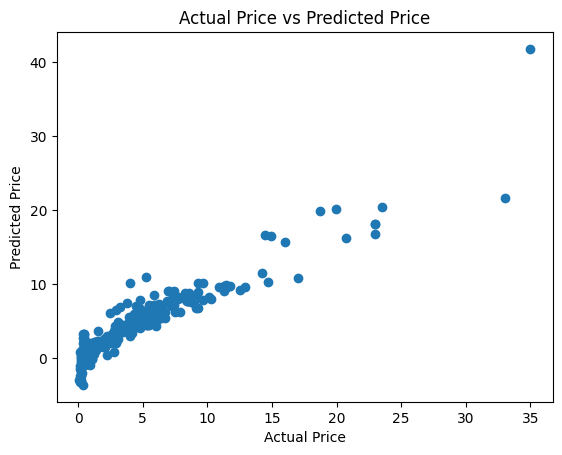

In [28]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

In [29]:
testing_data_prediction = linear_regressor.predict(X_test)

In [30]:
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.8735518306725039


In [31]:
custom_prediction = linear_regressor.predict([[2020,8.59,25000,0,0,0,0]])

C:\workspace\Machine learning with python\Projects\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
custom_prediction

array([7.52131311])

In [36]:
import pickle

In [37]:
file = open("car_model.pkl","wb")

In [38]:
pickle.dump(linear_regressor,file)

In [45]:
file = open('car_model.pkl', 'rb')

In [46]:
model = pickle.load(file)

In [47]:
custom_prediction = model.predict([[2020,8.59,25000,0,0,0,0]])

C:\workspace\Machine learning with python\Projects\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
custom_prediction

array([7.52131311])